In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate List of Cities

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Start API Calls

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
record_count = 0

params = {
    "appid": weather_api_key,
    "units": "Imperial",
    "q": ""
}

data = {
    "City": [],
    "Cloudiness": [],
    "Country": [],
    "Date": [],
    "Humidity": [],
    "Lat": [],
    "Lng": [],
    "Max Temp": [],
    "Wind Speed": [],
}

print("Beginning Data Retrieval")
print("--------------------------")



for city in cities:
    params["q"] = city
    response = requests.get(url, params)
#     print(response.url)
    response_json = response.json()
    record_count = record_count + 1

    try:
        data["City"].append(response_json["name"])
        data["Cloudiness"].append(response_json["clouds"]["all"])
        data["Country"].append(response_json["sys"]["country"])
        data["Date"].append(response_json["dt"])
        data["Humidity"].append(response_json["main"]["humidity"])
        data["Lat"].append(response_json["coord"]["lat"])
        data["Lng"].append(response_json["coord"]["lon"])
        data["Max Temp"].append(response_json["main"]["temp_max"])
        data["Wind Speed"].append(response_json["wind"]["speed"])
        print(f"Processing Record {record_count} | {city}")
    except:
        # Append null values
        print("City not found.  Skipping...")
        pass
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")


Beginning Data Retrieval
--------------------------
Processing Record 1 | pevek
Processing Record 2 | hermanus
Processing Record 3 | zhigansk
Processing Record 4 | lorengau
Processing Record 5 | albany
Processing Record 6 | vila velha
Processing Record 7 | new norfolk
Processing Record 8 | caravelas
Processing Record 9 | bluff
Processing Record 10 | bengkulu
Processing Record 11 | ribeira grande
Processing Record 12 | guanare
Processing Record 13 | east london
Processing Record 14 | mataura
Processing Record 15 | mahebourg
Processing Record 16 | upernavik
Processing Record 17 | esperance
Processing Record 18 | rikitea
Processing Record 19 | tautira
Processing Record 20 | faya
Processing Record 21 | dafeng
Processing Record 22 | tiksi
Processing Record 23 | ocos
Processing Record 24 | nioro
Processing Record 25 | jipapad
Processing Record 26 | sobolevo
Processing Record 27 | bethel
Processing Record 28 | berlevag
Processing Record 29 | leningradskiy
Processing Record 30 | qaanaaq
Proces

City not found.  Skipping...
Processing Record 252 | yulara
Processing Record 253 | luderitz
City not found.  Skipping...
Processing Record 255 | san juan de los morros
Processing Record 256 | mandali
Processing Record 257 | sura
Processing Record 258 | hobyo
Processing Record 259 | atasu
Processing Record 260 | severo-kurilsk
Processing Record 261 | hasaki
Processing Record 262 | iacu
Processing Record 263 | tra vinh
Processing Record 264 | belaya gora
Processing Record 265 | salvador
Processing Record 266 | southern pines
Processing Record 267 | muros
Processing Record 268 | codrington
Processing Record 269 | ayan
Processing Record 270 | okhotsk
Processing Record 271 | kismayo
Processing Record 272 | la roche-sur-yon
Processing Record 273 | kurilsk
Processing Record 274 | vao
City not found.  Skipping...
Processing Record 276 | weiser
Processing Record 277 | atherton
Processing Record 278 | hauterive
Processing Record 279 | nouadhibou
Processing Record 280 | fairlie
Processing Record

Processing Record 501 | golden
Processing Record 502 | yulin
Processing Record 503 | carutapera
Processing Record 504 | santo antonio do sudoeste
Processing Record 505 | semporna
Processing Record 506 | zhangye
Processing Record 507 | sungaipenuh
Processing Record 508 | key west
Processing Record 509 | alta floresta
Processing Record 510 | yerbogachen
City not found.  Skipping...
City not found.  Skipping...
Processing Record 513 | meulaboh
Processing Record 514 | lucea
Processing Record 515 | beaverlodge
Processing Record 516 | birin
Processing Record 517 | aklavik
Processing Record 518 | houma
Processing Record 519 | makungu
City not found.  Skipping...
Processing Record 521 | harbour breton
City not found.  Skipping...
Processing Record 523 | price
Processing Record 524 | karratha
Processing Record 525 | omsukchan
Processing Record 526 | sapulpa
City not found.  Skipping...
Processing Record 528 | wajima
Processing Record 529 | jonkoping
Processing Record 530 | sinazongwe
Processing

In [5]:
df = pd.DataFrame(data)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pevek,54,RU,1584217290,76,69.70,170.31,-10.89,9.19
1,Hermanus,53,ZA,1584217291,88,-34.42,19.23,64.99,13.40
2,Zhigansk,100,RU,1584217291,95,66.77,123.37,-5.85,21.77
3,Lorengau,100,PG,1584217291,78,-2.02,147.27,83.79,12.21
4,Albany,75,US,1584216776,42,42.60,-73.97,46.00,23.04


In [9]:
df.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [12]:
df.to_csv(output_data_file)

In [34]:
weather_data = df.set_index('City')
weather_data.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
Pevek,54,RU,1584217290,76,69.70,170.31,-10.89,9.19
Hermanus,53,ZA,1584217291,88,-34.42,19.23,64.99,13.40
Zhigansk,100,RU,1584217291,95,66.77,123.37,-5.85,21.77
Lorengau,100,PG,1584217291,78,-2.02,147.27,83.79,12.21
Albany,75,US,1584216776,42,42.60,-73.97,46.00,23.04


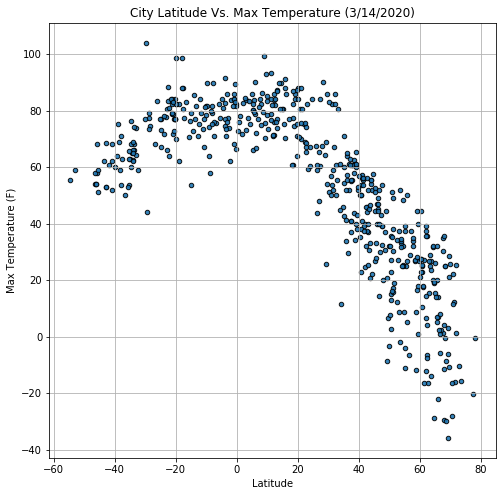

In [35]:
# Create a scatter plot which compares MPG to horsepower
weather_data.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),alpha=0.9,marker="o",edgecolors="black",
              title="City Latitude Vs. Max Temperature (3/14/2020)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.show()

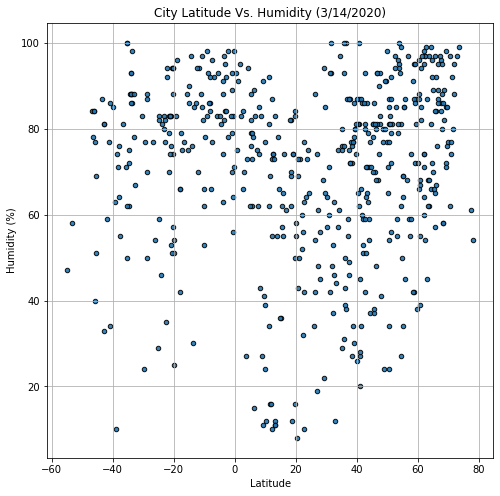

In [32]:
# Create a scatter plot which compares MPG to horsepower
weather_data.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),alpha=0.9,marker="o",edgecolors="black",
              title="City Latitude Vs. Humidity (3/14/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.show()

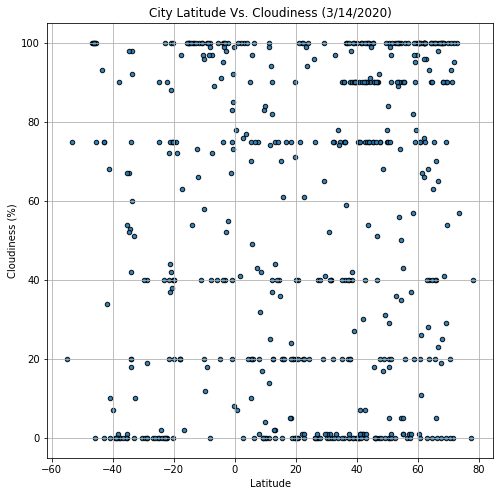

In [36]:
# Create a scatter plot which compares MPG to horsepower
weather_data.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),alpha=0.9,marker="o",edgecolors="black",
              title="City Latitude Vs. Cloudiness (3/14/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.show()

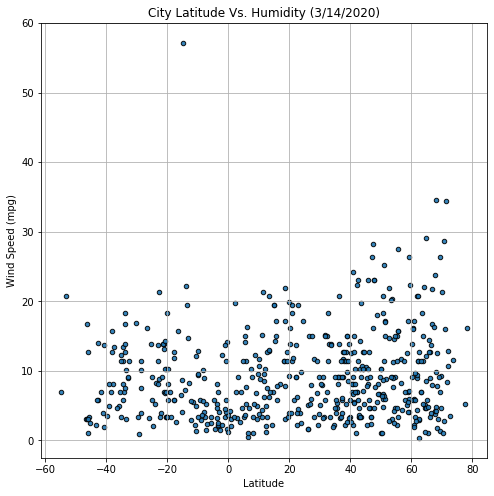

In [37]:
# Create a scatter plot which compares MPG to horsepower
weather_data.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),alpha=0.9,marker="o",edgecolors="black",
              title="City Latitude Vs. Humidity (3/14/2020)")
plt.ylabel("Wind Speed (mpg)")
plt.xlabel("Latitude")
plt.show()